# 지도학습(Supervised Learning): 정답 데이터를 통해 X가 무엇인지 분류하는 방법을 배우게 하는 학습
# 비지도학습(Unsupervised Learning):  명확한 정답 데이터가 라벨(label)로 달려있지 않은 수많은 데이터를 분류하는 방법을 배우게 하는 학습

## 오로지 데이터셋의 특징(feature) 및 패턴을 기반으로 모델 스스로가 판단한다.
## 라벨링이 되어 있지 않은 데이터들 내에서 비슷한 특징이나 패턴을 가진 데이터들끼리 군집화한 후, 새로운 데이터가 어떤 군집에 속하는지를 추론하는 비지도학습과 같은 방법론

## <비지도학습 예시>
* ### 군집화(클러스터링, clustering) - K-means, DBSCAN 알고리즘, 차원 축소의 대표적인 방법인 PCA(Principal Component Analysis), T-SNE
* ### 차원 축소(dimensionality reduction)
* ### 이를 이용한 데이터 시각화, 생성 모델(generative model)

## 🎯K-Means: 임의로 k개의 그룹으로 뭉치는 것
### - 주어진 데이터들을 k 개의 클러스터로 묶는 알고리즘으로 대표적인 클러스터링 기법 중 하나
### - 임의로 지정한 k개의 중심점이 새로운 label
### 🔴1) 데이터 생성

In [4]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 중심점이 5개인 100개의 점 데이터를 무작위로 생성합니다.
points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)

print(points.shape, points[:10])  # 무작위로 생성된 점의 좌표 10개 출력
print(labels.shape, labels[:10])    # 10개의 점들이 각각 대응하는 중심점(label) 값 출력

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


In [5]:
print(points.shape)
# print(points[:,0])

(100, 2)


### sklearn의 make_blob()을 활용하여 중심점이 5개인 무작위의 점 데이터 100개를 생성
### 한눈에 보기에도 아래의 데이터들은 5개의 군집을 이루고 있는 것처럼 보인다

,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


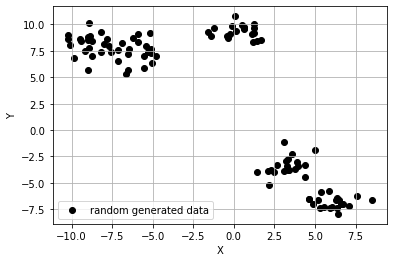

In [6]:
# 축 그리기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 위에서 생성한 점 데이터들을 pandas DataFrame 형태로 변환하기
points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head())

# 점 데이터를 X-Y grid에 시각화하기
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### 🔴2) 생성한 데이터에 K-means 알고리즘 적용
### 유클리디안 거리(L2 거리): 좌표축 위에 존재하는 데이터들 사이의 거리는 쉽게 계산
### 참고 - http://egloos.zum.com/metashower/v/9957577

### 전체적인 K-Means 알고리즘 구하는 방법


        원하는 클러스터의 수(K)를 결정합니다.
        무작위로 클러스터의 수와 같은 K개의 중심점(centroid)을 선정합니다. 이들은 각각의 클러스터를 대표합니다.
        나머지 점들과 모든 중심점 간의 유클리드 거리를 계산한 후, 가장 가까운 거리를 가지는 중심점의 클러스터에 속하도록 합니다.
        각 K개의 클러스터의 중심점을 재조정합니다. 특정 클러스터에 속하는 모든 점들의 평균값이 해당 클러스터 다음 iteration의 중심점이 됩니다.(이 중심점은 실제로 존재하는 데이터가 아니여도 상관없습니다.)
        재조정된 중심점을 바탕으로 모든 점들과 새로 조정된 중심점 간의 유클리드 거리를 다시 계산한 후, 가장 가까운 거리를 가지는 클러스터에 해당 점을 재배정합니다.
        4.번과 5.번을 반복 수행합니다. 반복의 횟수는 사용자가 적절히 조절하면 되고, 특정 iteration 이상이 되면 수렴(중심점이 더이상 바뀌지 않음)하게 됩니다.



In [7]:
from sklearn.cluster import KMeans

# 1), 2) 위에서 생성한 무작위 점 데이터(points)에 클러스터의 수(K)가 5인 K-means 알고리즘을 적용 
kmeans_cluster = KMeans(n_clusters=5)

# 3) ~ 6) 과정이 전부 함축되어 있는 코드입니다. points에 대하여 K가 5일 때의 K-means iteration을 수행
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4]


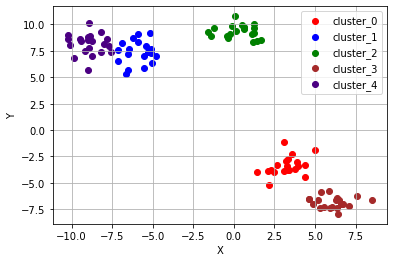

In [8]:
# 시각화

# n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'green', 3:'brown', 4:'indigo'} 

# 점 데이터를 X-Y grid에 시각화합니다.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# K-means clustering의 결과대로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster] # 전체 무작위 점 데이터에서 K-means 알고리즘에 의해 군집화된 sub data를 분리합니다. 
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster)) # 해당 sub data를 plot합니다.

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### >> 우리가 처음에 예상했던 것처럼 5개의 그룹이 잘 분리된 것으로 보아 K-means 알고리즘은 군집의 수 만 주어진다면, 데이터의 군집화를 매우 잘 수행한다는 것을 확인할 수 있어요. 그런데 사실, K-means 알고리즘이 항상 만능 열쇠는 아닙니다. 주어진 데이터의 분포에 따라 우리가 의도하지 않은 결과를 초래할 수 있어요. 

### 🔴3) K-means 알고리즘이 잘 동작하지 않는 예시들

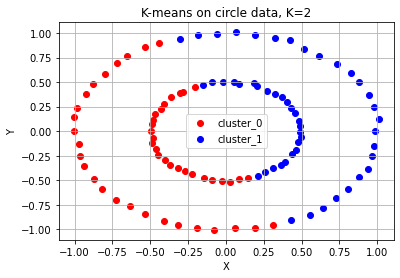

In [9]:
# K-means 알고리즘으로 군집화가 잘 되지 않는 경우

# K-means algorithm이 잘 동작하지 않는 예시 (1) 원형 분포
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

### 첫번째 원형으로 분포되어 있는 데이터 같은 경우는 아마 대부분의 사람들이 '가운데 작은 원'과 '바깥쪽 큰 원' 두 개의 군집으로 분류하기를 원했을 거에요. 하지만 K-means 알고리즘은 이 데이터들을 마치 케잌을 칼로 자르듯이 반으로 나눴네요.

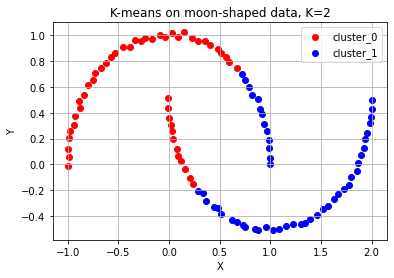

In [10]:
# K-means algorithm이 잘 동작하지 않는 예시 (2) 달 모양 분포
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) # 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 달 모양 분포 데이터 plot
moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

### 두 개의 달 형태를 분리해서 군집화하지 않고, 이 역시 y축에 대하여 칼로 자른 형태의 느낌으로 두 개의 군집을 나눴네요.

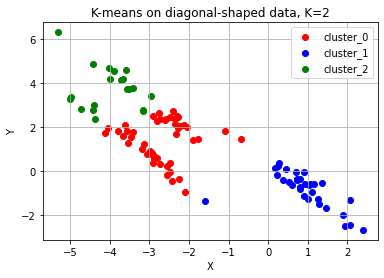

In [11]:
# K-means algorithm이 잘 동작하지 않는 예시 (3) 대각선 모양 분포
from sklearn.datasets import make_circles, make_moons, make_blobs

# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) #대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
transformation = [[0.6, -0.6], [-0.4, 0.8]] #대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) #본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 대각선 모양 분포 데이터 plot
diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

### 크게 3개의 대각선 방향으로 나열되어 있는 데이터들 역시 예상대로 군집을 이루지 않습니다. 

### K-means가 잘 적용되지 않는 경우

    군집의 개수(K 값)를 미리 지정해야 하기 때문에 이를 알거나 예측하기 어려운 경우에는 사용하기 어렵다.
    유클리드 거리가 가까운 데이터끼리 군집이 형성되기 때문에 데이터의 분포에 따라 유클리드 거리가 멀면서 밀접하게 연관되어 있는 데이터들의 군집화를 성공적으로 수행하지 못할 수 있다.


## 🎯DBSCAN
### DBSCAN(Density Based Spatial Clustering of Applications with Noise) 알고리즘은 가장 널리 알려진 밀도(density) 기반의 군집 알고리즘
### K 값을 미리 지정할 필요가 없다는 점
### 조밀하게 몰려 있는 클러스터를 군집화하는 방식을 사용하기 때문에 원 모양의 군집이 아닌 불특정한 형태의 군집도 찾을 수 있다.
### 참고 - http://primo.ai/index.php?title=Density-Based_Spatial_Clustering_of_Applications_with_Noise_(DBSCAN)
### 클러스터가 최초의 임의의 점 하나로부터 점점 퍼져나가는데 그 기준이 바로 일정 반경 안의 데이터의 갯수, 즉 데이터의 밀도이기 때문

### 🔴1) DBSCAN 알고리즘의 동작

    epsilon: 클러스터의 반경
    minPts: 클러스터를 이루는 개체의 최솟값
    core point: 반경 epsilon 내에 minPts 개 이상의 점이 존재하는 중심점
    border point: 군집의 중심이 되지는 못하지만, 군집에 속하는 점
    noise point: 군집에 포함되지 못하는 점
### epsilon과 minPts 값은 미리 지정해 주어야 하는 변수

### DBSCAN 작동 순서


        임의의 점 p를 설정하고, p를 포함하여 주어진 클러스터의 반경(elipson)안에 포함되어 있는 점들의 갯수를 세요.
        만일 해당 원에 minPts 개 이상의 점이 포함되어 있으면, 해당 점 p를 core point로 간주하고 원에 포함된 점들을 하나의 클러스터로 묶어요.
        해당 원에 minPts 개 미만의 점이 포함되어 있으면, 일단 pass 합시다.
        모든 점에 대하여 돌아가면서 1~3 번의 과정을 반복하는데, 만일 새로운 점 p'가 core point가 되고 이 점이 기존의 클러스터(p를 core point로 하는)에 속한다면, 두 개의 클러스터는 연결되어 있다고 하며 하나의 클러스터로 묶어줘요.
        모든 점에 대하여 클러스터링 과정을 끝냈는데, 어떤 점을 중심으로 하더라도 클러스터에 속하지 못하는 점이 있으면 이를 noise point로 간주해요. 또한, 특정 군집에는 속하지만 core point가 아닌 점들을 border point라고 칭해요.



# of cluster: 2
DBSCAN Y-hat: [0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0
 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0]


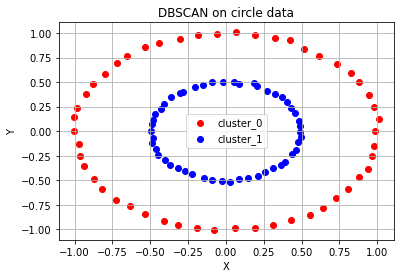

In [12]:
# DBSCAN으로 circle, moon, diagonal shaped data를 군집화한 결과
from sklearn.cluster import DBSCAN

fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

# 원형 분포 데이터 plot
epsilon, minPts = 0.2, 3 # 2)와 3) 과정에서 사용할 epsilon, minPts 값을 설정
circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts) # 위에서 생성한 원형 분포 데이터에 DBSCAN setting
circle_dbscan.fit(circle_points) # 3) ~ 5) 과정을 반복
n_cluster = max(circle_dbscan.labels_)+1 # 3) ~5) 과정의 반복으로 클러스터의 수 도출

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {circle_dbscan.labels_}')

# DBSCAN 알고리즘의 수행결과로 도출된 클러스터의 수를 기반으로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(n_cluster):
    cluster_sub_points = circle_points[circle_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 2
DBSCAN Y-hat: [0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1
 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0
 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0]


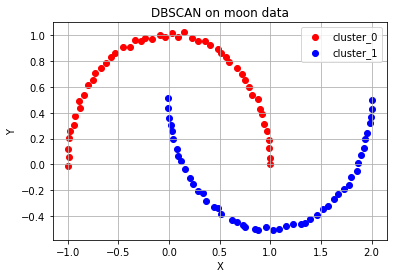

In [13]:
# 달 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.4, 3
moon_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
moon_dbscan.fit(moon_points)
n_cluster = max(moon_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {moon_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = moon_points[moon_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on moon data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 3
DBSCAN Y-hat: [ 0  1  1  0  0  2  2  0  1  2  2  2  0  2  0  1  2  2  2  1  1  1  1  1
  2  2  0  1  0  2  1  0  2  1  2  0  0  0  0  0  1  0  1  0  0  2  1  1
  0  2  1  1  2  1  0  2 -1  2  0  0  2  0  0  1  0  1  1  2  2  2 -1  0
  2  0  0  0  1  2  2 -1  2  2  1  2  0  0  2  1  1  2  1  1  2  0 -1  1
  0  0  0  1]


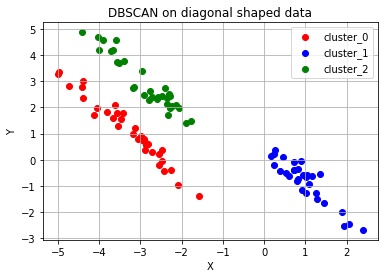

In [14]:
# 대각선 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### >>> DBSCAN Y-hat 결과가 -1인 경우가 가끔 눈에 띄시나요? 어느 군집에도 포함되지 못한 noise point가 존재한다는 것을 기억해 주세요. 

위 코드에서 확인할 수 있듯이, epsilon과 minPts 값을 잘 조절해주면 DBSCAN 알고리즘에 따라 클러스터의 수를 명시해주지 않아도 적절한 클러스터의 개수를 설정하여 주어진 데이터에 대한 군집화를 수행할 수 있어요. 클러스터의 수를 지정해 주고, 데이터의 분포를 신경써야 하는 K-means 알고리즘에 비해 훨씬 유연한 사용이 가능하기 때문에 DBSCAN은 굉장히 보편적으로 사용되는 군집화 알고리즘이에요. 

### DBSCAN 단점?

# of samples: 100 / Elapsed time of K-means: 0.01555s / DBSCAN: 0.00094s
# of samples: 500 / Elapsed time of K-means: 0.01855s / DBSCAN: 0.00252s
# of samples: 1000 / Elapsed time of K-means: 0.02088s / DBSCAN: 0.00542s
# of samples: 2000 / Elapsed time of K-means: 0.02776s / DBSCAN: 0.01341s
# of samples: 5000 / Elapsed time of K-means: 0.05295s / DBSCAN: 0.06325s
# of samples: 7500 / Elapsed time of K-means: 0.12938s / DBSCAN: 0.11065s
# of samples: 10000 / Elapsed time of K-means: 0.05824s / DBSCAN: 0.16369s
# of samples: 20000 / Elapsed time of K-means: 0.06469s / DBSCAN: 0.46921s
# of samples: 30000 / Elapsed time of K-means: 0.07384s / DBSCAN: 0.79132s
# of samples: 40000 / Elapsed time of K-means: 0.08651s / DBSCAN: 1.22457s
# of samples: 50000 / Elapsed time of K-means: 0.11722s / DBSCAN: 1.75636s


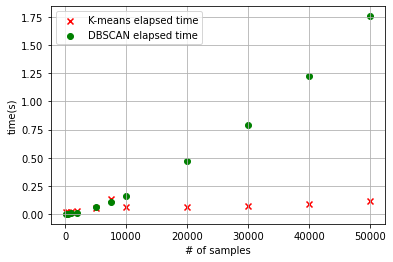

In [15]:
# DBSCAN 알고리즘과 K-means 알고리즘의 시간을 비교하는 코드 
import time

n_samples= [100, 500, 1000, 2000, 5000, 7500, 10000, 20000, 30000, 40000, 50000]

kmeans_time = []
dbscan_time = []
x = []
for n_sample in n_samples:
    dummy_circle, dummy_labels = make_circles(n_samples=n_sample, factor=0.5, noise=0.01) # 원형의 분포를 가지는 데이터 생성

    kmeans_start = time.time()
    circle_kmeans = KMeans(n_clusters=2)
    circle_kmeans.fit(dummy_circle)
    kmeans_end = time.time()

    dbscan_start = time.time()
    epsilon, minPts = 0.2, 3
    circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    circle_dbscan.fit(dummy_circle)
    dbscan_end = time.time()
    x.append(n_sample)
    kmeans_time.append(kmeans_end-kmeans_start)
    dbscan_time.append(dbscan_end-dbscan_start)
    print("# of samples: {} / Elapsed time of K-means: {:.5f}s / DBSCAN: {:.5f}s".format(n_sample, kmeans_end-kmeans_start, dbscan_end-dbscan_start))

# K-means와 DBSCAN의 소요 시간 그래프화
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, kmeans_time, c='red', marker='x', label='K-means elapsed time')
ax.scatter(x, dbscan_time, c='green', label='DBSCAN elapsed time')
ax.set_xlabel('# of samples')
ax.set_ylabel('time(s)')
ax.legend()
ax.grid()

### 데이터의 수가 적을 때는 K-means 알고리즘의 수행시간이 DBSCAN에 비해 더 길었으나, 군집화할 데이터의 수가 많아질수록 DBSCAN의 알고리즘 수행시간이 급격하게 늘어나게 됩니다.
### 또한 클러스터의 수를 지정해 줄 필요가 없으나 데이터 분포에 맞는 epsilon과 minPts의 값을 지정해 주어야 한다는 점 등이 단점으로 여겨지네요.

## 🎯차원 축소(1) PCA - 주성분 분석
### 차원 축소는 이처럼 수많은 정보 속에서 우리에게 더 중요한 요소가 무엇인지를 알게 해주는 방법
### 데이터를 나타내는 여러 특징(feature)들 중에서 어떤 특징이 가장 그 데이터를 잘 표현(represent)하는지 알게 해주는 특징 추출(feature extraction)의 용도로 사용

* PCA는 데이터 분포의 주성분을 찾아주는 방법이에요. 여기서 주성분이라는 의미는 데이터의 분산이 가장 큰 방향벡터를 의미해요.
* PCA는 데이터들의 분산을 최대로 보존하면서, 서로 직교(orthogonal)하는 기저(basis, 분산이 큰 방향벡터의 축)들을 찾아 고차원 공간을 저차원 공간으로 사영(projection)해요.
* 또한 PCA에서는 기존 **feature 중 중요한 것을 선택하는 방식이 아닌 기존의 feature를 선형 결합(linear combination)하는 방식**을 사용하고 있어요. 

### 새로운 좌표계 역할을 할 수 있는 벡터의 모음을 기저(basis)
###  그래서 우리가 사용하는 좌표값이란, 실은 기저의 선형결합으로 표현된 것입니다. (1, 1)이란 X방향 1, Y방향 1의 선형결합일 뿐이죠

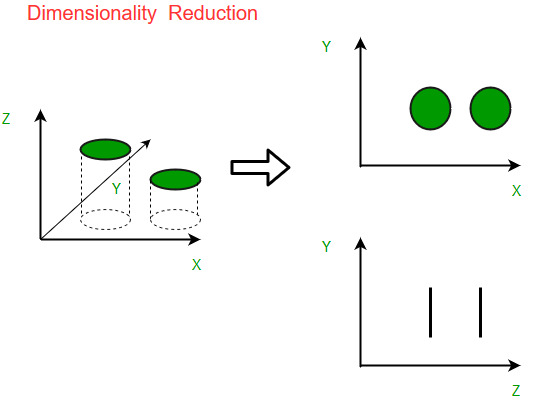

위 그림과 같이 타원형 분포로 되어있는 데이터들이 있을 때, 차원의 수는 줄이면서 데이터 분포의 분산을 최대한 유지하기 위해 가장 분산이 긴 축을 첫 기저로 잡고, 그 기저에 직교하는 축 중 가장 분산이 큰 값을 다음 기저로 잡게 돼요. 이 과정을 반복하게 되면 차원의 수를 최대로 줄이면서 데이터 분포의 분산을 그대로 유지할 수 있답니다. 이것을 차원 축소라고 하는데요, 위 그림에서라면 여러 개의 차원으로 구성된 데이터들을 2개의 차원으로 축소해도 정보의 손실을 최소화하여 데이터의 분포를 충분히 표현할 수 있다는 의미에요.

여기서 차원 축소의 핵심 개념으로 사영(projection)이라는 용어가 등장하는데, 이를 설명하기 위해 위 그림을 참고해 주세요.

X-Y-Z 좌표축상에 존재하는 데이터를 X-Y, Y-Z 좌표축에 사영(projection) 했다는 것은 각각 Z, X 좌표축을 무시했다는 뜻이 됩니다. 그러면 무시한 데이터만큼의 정보손실이 일어나겠죠. 위 그림의 경우 원본 데이터의 특성을 상대적으로 잘 살리면서 차원을 1개 줄인 것은 X-Y일까요? Y-Z일까요? 아무래도 X-Y이겠죠? 그렇다면 Z축 방향의 정보는 상대적으로 덜 중요하다.(수학적으로는 Z축 방향의 분산이 작다.)고 할 수 있습니다.

PCA는 차원축소를 시도하되, 주어진 좌표축 방향이 아니라, 가장 분산이 길게 나오는 기저(basis) 방향을 찾아서 그 방향의 기저만 남기고, 덜 중요한 기저 방향을 삭제하는 방식으로 진행됩니다. 이렇게 찾은 가장 중요한 기저를 주성분(Principal Component) 방향, 또는 pc축이라고 합니다. 

### 🔴1) 데이터 개요
### 각각의 row에 해당 환자가 악성 종양(malignant, 0)을 가지고 있는지, 양성 종양(benign, 1)을 가지고 있는지 라벨링
###  차원 축소를 적용하지 않은 original data와 PCA를 적용한 data를 이용하여 SVM classifier를 훈련시킨 후, 각각의 테스트 데이터셋을 통해 정확도를 확인하는 코드를 직접 실행해 봄으로써 PCA가 어떤 효과를 가져다 주는지 확인해봐요. 

In [16]:
# 차원 축소 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y = 0(Malignant - 악성 종양), y=1(Benign - 양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

# color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'red', 3:'blue'}
target_dict = {0: 'malignant_train', 1: 'benign_train', 2: 'malignant_test', 3:'benign_test'}

#Train data에 PCA 알고리즘 적용
train_X_ = StandardScaler().fit_transform(train_X) # 불러온 데이터에 대한 정규화 -> 각 column의 range of value가 전부 다르기 때문에 정규화를 진행해 주어야 합니다.
train_df = pd.DataFrame(train_X_, columns=cancer['feature_names'])
pca = PCA(n_components=2) # 주성분의 수를 2개, 즉 기저가 되는 방향벡터를 2개로 하는 PCA 알고리즘 수행
pc = pca.fit_transform(train_df)

### >> tandScaler().fit_transform() 과정을 수행하는 이유는 각 열마다의 값의 범위가 전부 달라서 그렇습니다. 예를 들어, 첫번째와 두번째 열 데이터인 'mean radius'와 'mean texture'의 범위는 다른데, 두 값이 전부 5라는 값을 가진다고 해서 같은 영향을 준다고 취급하면 안되거든요.

In [18]:
#Test data에 PCA 알고리즘 적용
test_X_ = StandardScaler().fit_transform(test_X) # normalization
test_df = pd.DataFrame(test_X_, columns=cancer['feature_names'])
pca_test = PCA(n_components=2)
pc_test = pca_test.fit_transform(test_df)

In [19]:
# 훈련한 classifier의 decision boundary를 그리는 함수
def plot_decision_boundary(X, clf, ax): 
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap='Blues')

# PCA를 적용한 train data의 classifier 훈련: classfier로 Support Vector Machine(SVM) 사용
clf = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf.fit(pc, train_y) # train data로 classifier 훈련

# PCA를 적용하지 않은 original data의 SVM 훈련
clf_orig = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf_orig.fit(train_df, train_y)

SVC(C=0.8, gamma=0.5)

여기서는 서포트 벡터 머신 분류기(SVM classifier)를 훈련시켜 줍니다. 이 SVM classifier는 주성분(PC)을 기반으로 해당 점이 양성인지 악성인지를 구분해주는 결정 경계선(decision boundary)에 해당하는데, train data에 맞게 경계선이 그어질 수 있도록 이를 훈련시키는 단계에 해당

PCA 분석을 사용한 Test dataset accuracy: 54명/57명 => 0.947
PCA를 적용하지 않은 Test dataset accuracy: 43명/57명 => 0.754


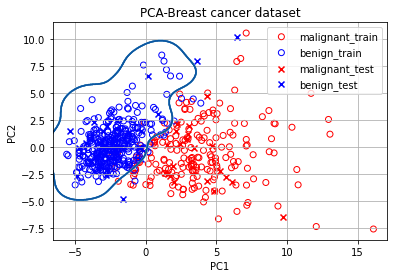

In [20]:
# 캔버스 도식
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# malignant와 benign의 SVM decision boundary 그리기
plot_decision_boundary(pc, clf, ax)

#Train data 도식
for cluster in range(2):
    sub_cancer_points = pc[train_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], edgecolor=color_dict[cluster], c='none', label=target_dict[cluster])
#Test data 도식
for cluster in range(2):
    sub_cancer_points = pc_test[test_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], marker= 'x', c=color_dict[cluster+2], label=target_dict[cluster+2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA-Breast cancer dataset')
ax.legend()
ax.grid()

# Scoring
pca_test_accuracy_dict = Counter(clf.predict(pc_test) == test_y)
orig_test_accuracy_dict = Counter(clf_orig.predict(test_df) == test_y)

print("PCA 분석을 사용한 Test dataset accuracy: {}명/{}명 => {:.3f}".format(pca_test_accuracy_dict[True], sum(pca_test_accuracy_dict.values()), clf.score(pc_test, test_y)))
print("PCA를 적용하지 않은 Test dataset accuracy: {}명/{}명 => {:.3f}".format(orig_test_accuracy_dict[True], sum(orig_test_accuracy_dict.values()), clf_orig.score(test_df, test_y)))

단 2개의 주성분 feature 만으로 분류한 PCA classifier의 정확도가 30개의 feature를 모두 사용한 original classifier보다 훨씬 높은 분류 정확도를 보여주네요. 모든 feature를 이용한 방식의 정확도가 더 낮은 이유 중 하나는 바로 제공된 30개의 feature 중 종양의 악성/양성과 관련없는 것이 존재해서 해당 feature가 오히려 분류를 방해했기 때문이에요.
그래서 feature의 수가 적더라도, 악성/양성과 관련이 깊은 중요한 feature만을 이용한 분류의 정확도가 훨씬 더 높을 수 있는거죠. 위 유방암 데이터셋에서 살펴보았듯이, PCA는 각 feature 간 상관관계가 있고 이를 추릴 필요가 있을 때 유용하게 사용되는 비지도학습 방법 중 하나입니다.

## 🎯차원 축소(1) T-SNE
###  T-SNE(T-Stochastic Neighbor Embedding): 시각화에 많이 쓰이는 알고리즘

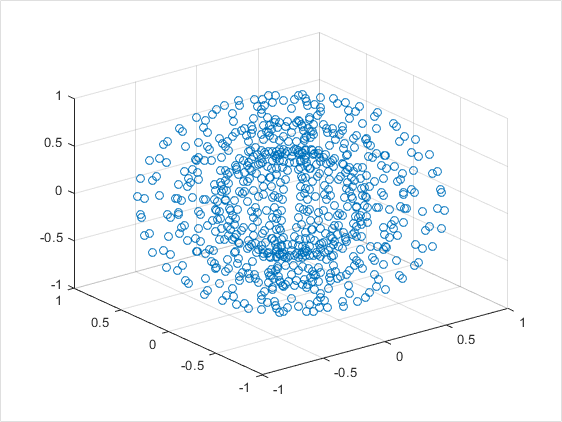

위의 이미지처럼 방사형적, 비선형적 데이터에서는 많은 정보량을 담기 위한 주성분(Principal Component)으로 잡을 선형적인 축을 찾기 어렵습니다. 따라서, 위 데이터를 PCA를 이용해 2차원으로 표현한다면, 멀리 있는 데이터가 가까이 있도록 차원축소가 이루어질 것입니다. 시각화하여 데이터를 이해한다는 목적과는 잘 맞지 않는 것이죠

###  T-SNE는 **기존 차원의 공간에서 가까운 점들은, 차원축소된 공간에서도 여전히 가깝게 유지 되는 것**을 목표로 한다.
### PCA는 데이터가 가진 고유한 물리적 정보량을 보존하는데 주력하지만, T-SNE는 고유한 물리적 정보량보다는 데이터들간의 상대적 거리를 보존하는데 주력

### 🔴1) 사이킷런(scikit-learn)에서 MNIST 데이터 불러오기

In [21]:
print("실행 중입니다... 시간이 다소 걸릴 수 있어요. :)\n===")

from sklearn.datasets import fetch_openml

# 784 pixel로 이뤄진 mnist 이미지 데이터 호출
mnist = fetch_openml("mnist_784",version=1)

X = mnist.data / 255.0
y = mnist.target
print("X shape: ",X.shape)
print("Y shape: ",y.shape)

실행 중입니다... 시간이 다소 걸릴 수 있어요. :)
===
X shape:  (70000, 784)
Y shape:  (70000,)


In [22]:
import sklearn
print(sklearn.__version__)

0.23.2


In [23]:
n_image = X.shape[0]
n_image_pixel = X.shape[1]

pixel_columns = [ f"pixel{i}" for i in range(n_image_pixel) ] #  픽셀정보가 있는 칼럼의 이름을 담은 목록
len(pixel_columns)

784

### DataFrame으로 만들기

In [24]:
import pandas as pd

df = pd.DataFrame(X,columns=pixel_columns)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i)) # 숫자 라벨을 스트링으로 만드는 함수를 파이썬 람다 문법으로 전체 데이터에 적용합니다.
X, y = None, None

### 7만 개의 이미지 데이터 중 1만 개를 랜덤샘플링.

In [25]:
import numpy as np

# 결과가 재생산 가능하도록 랜덤 시드를 지정합니다.
np.random.seed(30)

# 이미지 데이터의 순서를 랜덤으로 뒤바꾼(permutation) 배열을 담습니다.
rndperm = np.random.permutation(n_image)

# 랜덤으로 섞은 이미지 중 10,000개를 뽑고, df_subset에 담습니다.
n_image_sample = 10000
random_idx = rndperm[:n_image_sample]
df_subset = df.loc[rndperm[:n_image_sample],:].copy()
df_subset.shape

(10000, 786)

### matplot 라이브러리를 통해 시각화

<Figure size 432x288 with 0 Axes>

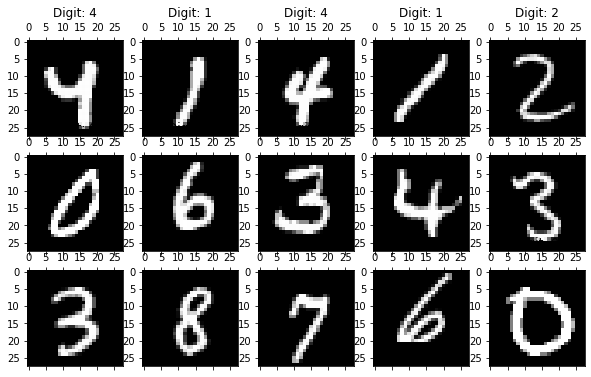

In [26]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.gray()
fig = plt.figure( figsize=(10,6) )
n_img_sample = 15
width,height = 28,28

# 15개 샘플을 시각화해 봅니다. 
for i in range(0,n_img_sample):
    row = df_subset.iloc[i]
    ax = fig.add_subplot(3,5,i+1, title=f"Digit: {row['label']}")
    ax.matshow(row[pixel_columns]
               .values.reshape((width,height))
               .astype(float))

plt.show()

### 🔴2) PCA 를 이용한 MNIST 차원축소
### - 사이킷런에서 제공하는 PCA 모듈을 사용하여 차원을 축소할 수 있습니다.

In [27]:
from sklearn.decomposition import PCA

print("df_subset의 shape: {}".format(df_subset.shape))

n_dimension = 2 # 축소시킬 목표 차원의 수
pca = PCA(n_components=n_dimension)

pca_result = pca.fit_transform(df_subset[pixel_columns].values) # 차원을 축소한 결과
df_subset['pca-one'] = pca_result[:,0] # 축소한 결과의 첫 번째 차원 값
df_subset['pca-two'] = pca_result[:,1] # 축소한 결과의 두 번째 차원 값

print("pca_result의 shape: {}".format(pca_result.shape))

df_subset의 shape: (10000, 786)
pca_result의 shape: (10000, 2)


Principal Component 별로 보존하는 정보량을 확인합니다

    차원을 축소한 댓가로 차원의 정보량 중 일부만 남게 됩니다.
    sklearn의 PCA 모듈은 PC 축 마다 보존하는 정보량의 비율을 제시해 줍니다.


In [28]:
print(f"pca-1: {round(pca.explained_variance_ratio_[0],3)*100}%")
print(f"pca-2: {round(pca.explained_variance_ratio_[1],3)*100}%")

pca-1: 9.6%
pca-2: 7.3%


* 784차원을 2차원으로 차원축소 하였을 때, 정보량이 전체의 16.9%가 남게 됩니다.

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

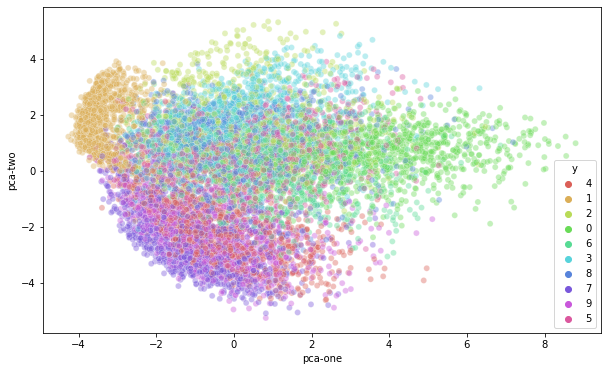

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,   # 2개의 PC축만 남은 데이터프레임 df_subset 을 시각화해 보자.
    legend="full",
    alpha=0.4
)


    PCA로 784차원을 2차원으로 줄인 결과 벡터를 Scatter 그래프로 그려보았습니다
    같거나 모양이 비슷한 숫자 이미지가 유사한 벡터값을 갖는것을 색상으로 확인할 수 있습니다.


### 🔴3) T-SNE 를 이용한 MNIST 차원축소
### - 사이킷런에서 제공하는 T-SNE 모듈을 사용하여 동일한 1만 개의 이미지 데이터의 차원을 축소
### (주의) 아래 코드의 tsne.fit_transform() 은 PCA보다는 확실히 시간이 많이 걸립니다. 

In [30]:
from sklearn.manifold import TSNE

print("df_subset의 shape: {}".format(df_subset.shape))

data_subset = df_subset[pixel_columns].values
n_dimension = 2
tsne = TSNE(n_components=n_dimension)
tsne_results = tsne.fit_transform(data_subset)

print("tsne_results의 shape: {}".format(tsne_results.shape))

df_subset의 shape: (10000, 788)
tsne_results의 shape: (10000, 2)


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

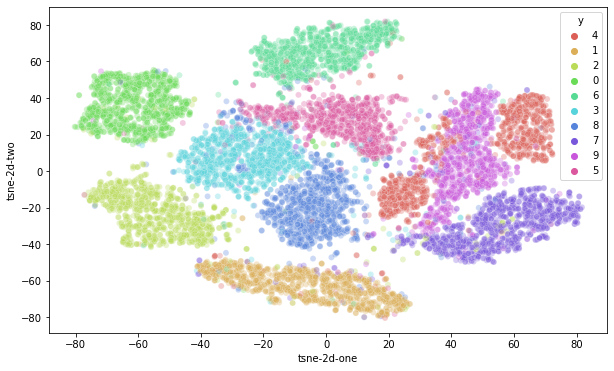

In [31]:
# tsne 결과를 차원별로 추가합니다.
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

# 시각화해 봅니다.
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

### PCA를 통해 차원축소를 하면서 발생하는 정보 손실의 과정 중에는 두 점 사이의 거리라는 중요한 정보가 함께 손실
###  만약 두 점의 거리가 PCA의 PC축을 따라 발생한 거리라면 유지가 되겠지만, 그렇지 않다면 PCA 과정을 통해 두 점 사이의 거리가 소거되고, 실제로는 먼 거리의 점들이 아주 가까운 점으로 투영될 가능성 많다.
### , T-SNE에서는 고차원에서 먼 거리의 두 점은 저차원에서도 먼 거리에 있어야 합니다. 그러므로 결과적으로 T-SNE를 시각화하면 숫자들 사이의 경계가 뚜렷이 나타나는 장점이 있습니다. 위에서 T-SNE를 훈련시켰을 때 label 정보를 전혀 참조하지 않고 df_subset[pixel_columns] 정보만 참고하여 얻은 결과라는 점에 주목
### 그래서 T-SNE는 분류기의 Feature Extractor 모델이 카테고리간 분류 경계선을 뚜렷하게 유지하고 있는지를 확인하는 용도로 자주 쓰임

### 그러면 T-SNE는 PCA보다 우월한 차원축소 기법일까요? 그렇지 않습니다.
### T-SNE의 두 차원은 물리적 의미를 가지지 않습니다. PCA는 정보 손실을 최소화하려는 관점을 가지고 있으므로, 그 결과 추출된 PC축은 주성분이라는 물리적 의미를 유지하고 있으며, 공분산을 통해 원본 데이터를 일정 부분 복원할 수 있는 가능성을 가지고 있습니다. 그러나 T-SNE는 정보 손실량에 주목하지 않으며, 그 결과 저차원 축이 아무런 물리적 의미를 가지지 못합니다. 오직 시각화에만 유리할 뿐입니다.

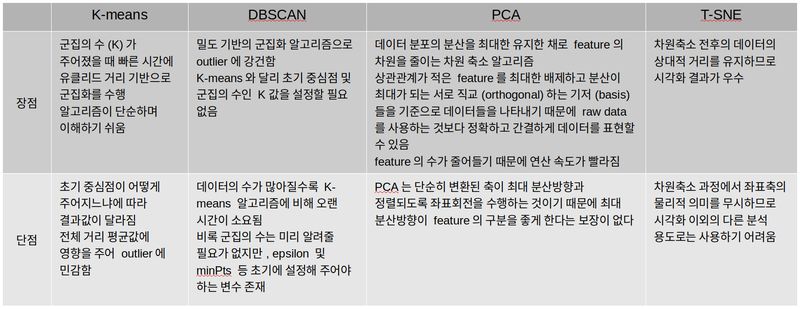